In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pylab as pl
import matplotlib.cm as cm
import matplotlib.patches as mpatches
import warnings
from matplotlib import cm
from matplotlib.colors import ListedColormap, BoundaryNorm
from numpy import nan
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn import datasets
from sklearn.exceptions import ConvergenceWarning
from sklearn.datasets import make_regression
from pandas import read_csv

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/specolombiahackathon/202104/main/AVANZADO/adv_train_data.csv')
dt = pd.read_csv('https://raw.githubusercontent.com/specolombiahackathon/202104/main/AVANZADO/adv_test_data.csv')
print('NaN - Training data')
print(df.isnull().sum())
print(df.shape)
df.fillna(df.mean(), inplace=True)
dt.fillna(df.mean(), inplace=True)
# count the number of NaN values in each column
df.fillna(df.mean(), inplace=True)
dt.fillna(df.mean(), inplace=True)
df['FLUIDTYPE'] = df['FLUIDTYPE'].fillna("")
df['RECOVERY'] = df['RECOVERY'].fillna("")
df['Aquifer'] = df['Aquifer'].fillna("")
dt['FLUIDTYPE'] = dt['FLUIDTYPE'].fillna("")
dt['RECOVERY'] = dt['RECOVERY'].fillna("")
dt['Aquifer'] = dt['Aquifer'].fillna("")
print('NaN - Test data')
print(dt.isnull().sum())
print(dt.shape)

NaN - Training data
CASENAME                  0
Depth                     0
Area                     21
RESTHICK                  0
PRESS                    13
TEMP                     13
OILGRAV                  13
SOLGOR                   37
Visco                    48
Psat                     52
Bo                       13
FLUIDTYPE                14
WATSAL                   78
Aquifer                  53
POROSITY                  0
NTG                       7
PERM                      0
CONWATER                 32
PERM.AQUIFER            129
OOIP                      0
RF                        0
RFmax                   129
Np                        0
Nw                        0
Ng                        0
Nwi                       0
GOR                      68
SWx                     183
RELPERM.RESSAT.Kro      342
RELPERM.ENDPOINT.Kro    296
RELPERM.ENDPOINT.Krw    103
RELPERM.EXPON.Kro       729
RELPERM.EXPON.Krw       600
PROD.PI                 254
WINJ.PI                 467


In [3]:

df.describe()

,Depth,Area,RESTHICK,PRESS,TEMP,OILGRAV,SOLGOR,Visco,Psat,Bo,...,WINJ.PI,PROD_TIME,Field.OILRATE,Field.WATRATE,Field.GASRATE,Field.INJWATRATE,Field.INJGASRATE,NumPROD,NumWINJ,BODP_well
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,...,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,6562.675000,20.429782,217.232500,3629.669632,175.907243,28.241550,347.549148,38.246941,1588.189840,1.126175,...,8.780781,33.162125,52979.790026,62122.823219,25.671642,40683.166904,2357.945736,18.025099,9.332857,49129.345559
std,3162.350814,8.721017,100.344331,1509.719497,43.350656,9.382178,421.238589,185.742847,1308.424258,0.142718,...,10.871245,16.263394,46286.574400,96355.551004,96.616397,57437.182113,9678.361697,26.955638,24.006607,25753.783002
min,1010.000000,2.600000,30.000000,770.000000,89.000000,11.500000,0.000000,0.200000,5.000000,1.016000,...,0.000000,5.000000,2000.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,1048.205790
25%,3777.500000,13.900000,140.000000,2357.500000,140.750000,20.100000,100.000000,1.100000,683.500000,1.048000,...,5.000000,18.775000,21375.000000,3675.000000,0.000000,0.000000,0.000000,7.000000,0.000000,31990.207861
50%,6740.000000,19.700000,206.000000,3630.000000,176.000000,27.850000,210.000000,3.600000,1309.000000,1.075000,...,8.780781,33.550000,40000.000000,30400.000000,0.000000,24100.000000,0.000000,11.000000,2.000000,49129.345559
75%,9392.500000,26.300000,285.250000,4870.000000,213.000000,35.900000,390.000000,17.600000,2015.750000,1.137225,...,8.780781,47.325000,69125.000000,70100.000000,25.671642,54475.000000,2357.945736,18.025099,9.332857,57032.268799
max,11990.000000,43.300000,486.000000,9710.000000,267.000000,48.800000,3870.000000,3900.500000,8815.000000,1.943000,...,188.000000,60.000000,334100.000000,890200.000000,1800.000000,380100.000000,129800.000000,453.000000,335.000000,129040.991108


In [4]:
dt.head()

,CASENAME,Depth,Area,RESTHICK,PRESS,TEMP,OILGRAV,SOLGOR,Visco,Psat,...,PROD_TIME,Field.OILRATE,Field.WATRATE,Field.GASRATE,Field.INJWATRATE,Field.INJGASRATE,NumPROD,NumWINJ,BODP_well,RECOVERY
0,1b54df2c,2720,13.500000,119,1560,134.0,13.7,40.000000,522.500000,492.0,...,33.162125,7100.0,22500.0,0.000000,40683.166904,2357.945736,16.000000,7.0,31497.742906,
1,84d69ded,1010,42.700000,93,1320,97.0,37.4,347.549148,2.200000,1198.0,...,33.162125,24000.0,0.0,0.000000,40683.166904,2357.945736,149.000000,201.0,49129.345559,
2,4376f799,11450,23.900000,78,5830,244.0,13.3,120.000000,38.246941,1613.0,...,33.162125,35000.0,56200.0,25.671642,40683.166904,2357.945736,18.025099,2.0,76594.632506,
3,80d83419,2360,30.500000,213,4830,133.0,40.1,1310.000000,1.000000,4373.0,...,33.162125,32000.0,113300.0,100.000000,40683.166904,2357.945736,35.000000,38.0,13310.549298,
4,47785e6d,5110,20.429782,120,3880,134.0,14.0,70.000000,883.200000,819.0,...,33.162125,6200.0,17400.0,0.000000,40683.166904,2357.945736,12.000000,7.0,35347.347899,


In [39]:
print(df['RECOVERY'].unique())
print(df.groupby('RECOVERY').size())

['Water Flooding' 'Primary' 'Miscible Gas Inejction' 'Non Commercial' ''
 'Polymer Flooding' 'Gas Cycling' 'Thermal']
RECOVERY
                           31
Gas Cycling                17
Miscible Gas Inejction     47
Non Commercial             21
Polymer Flooding            9
Primary                   346
Thermal                     6
Water Flooding            323
dtype: int64


In [5]:
conditions = [
    (df['RECOVERY'] == 'Water Flooding'),
    (df['RECOVERY'] ==  'Primary'),
    (df['RECOVERY'] ==  'Miscible Gas Inejction'),
    (df['RECOVERY'] ==  'Non Commercial'), 
    (df['RECOVERY'] ==  'Polymer Flooding'), 
    (df['RECOVERY'] ==  'Gas Cycling'), 
    (df['RECOVERY'] == 'Thermal')
    ]
values = [1, 2, 3, 4, 5, 6, 7]
df['recobro'] = np.select(conditions, values)


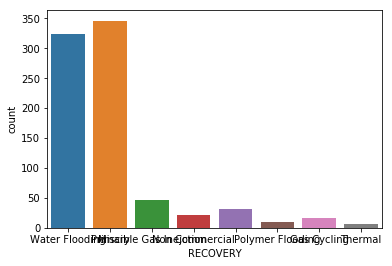

In [41]:
sns.countplot(df['RECOVERY'],label='recobro')
plt.show()

In [42]:
print(df['Aquifer'].unique())
print(df.groupby('Aquifer').size())

['Weak' 'Medium' 'Very Strong' 'Strong' '' 'None']
Aquifer
                53
Medium         264
None            27
Strong         112
Very Strong    128
Weak           216
dtype: int64


In [6]:
conditions = [
    (df['Aquifer'] == 'Medium'),
    (df['Aquifer'] ==  'None)'),
    (df['Aquifer'] ==  'Strong'),
    (df['Aquifer'] ==  'Very Strong'), 
    (df['Aquifer'] ==  'Weak')
    ]
values = [1, 2, 3, 4, 5]
df['acuifero'] = np.select(conditions, values)
conditions = [
    (dt['Aquifer'] == 'Medium'),
    (dt['Aquifer'] ==  'None)'),
    (dt['Aquifer'] ==  'Strong'),
    (dt['Aquifer'] ==  'Very Strong'), 
    (dt['Aquifer'] ==  'Weak')
    ]
values = [1, 2, 3, 4, 5]
dt['acuifero'] = np.select(conditions, values)

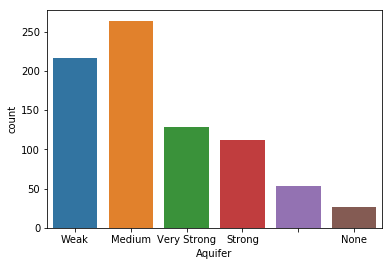

In [44]:
sns.countplot(df['Aquifer'],label='acuifero')
plt.show()

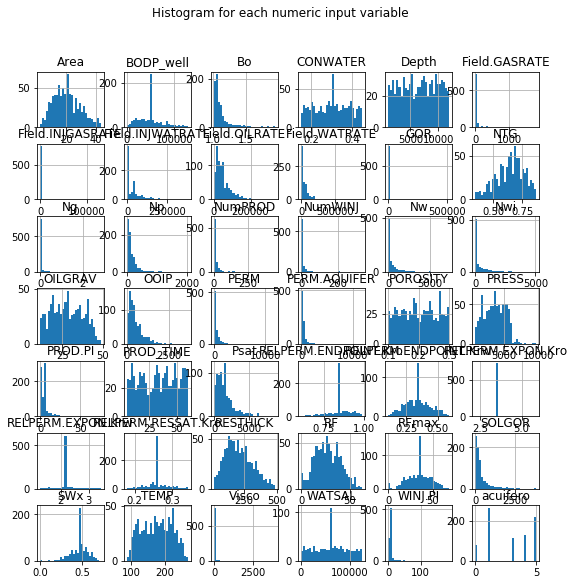

In [17]:
df.drop('recobro', axis=1).hist(bins=30, figsize=(9,9))
pl.suptitle("Histogram for each numeric input variable")
plt.savefig('field_hist')
plt.show()

In [22]:
feature_names = ['OILGRAV', 'PRESS', 'PERM', 'SOLGOR', 'Field.OILRATE', 'Field.WATRATE', 'Field.GASRATE','Field.INJWATRATE', 'Field.INJGASRATE','acuifero']
X = df[feature_names]
y = df['RF']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [24]:
X_train = X
y_train = y
X_test = dt[feature_names]
y_test = dt['RF']

In [25]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
dt['RF'] = y_pred 

In [27]:
feature_names = ['OILGRAV', 'PRESS', 'PERM', 'SOLGOR', 'Field.OILRATE', 'Field.WATRATE', 'Field.GASRATE','Field.INJWATRATE', 'Field.INJGASRATE','acuifero']
X = df[feature_names]
y = df['RFmax']

In [28]:
X_train = X
y_train = y
X_test = dt[feature_names]
y_test = dt['RFmax']

In [29]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [30]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
dt['RFmax'] = y_pred 

In [31]:

dt.to_csv('JUAN_CEBALLOS_ANALOGOS_v00.csv', index=False)

[[  2   1  14   3  79 101]
 [  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  0   0   0   0   0   0]]
                        precision    recall  f1-score   support

                             1.00      0.01      0.02       200
           Gas Cycling       0.00      0.00      0.00         0
Miscible Gas Inejction       0.00      0.00      0.00         0
      Polymer Flooding       0.00      0.00      0.00         0
               Primary       0.00      0.00      0.00         0
        Water Flooding       0.00      0.00      0.00         0

              accuracy                           0.01       200
             macro avg       0.17      0.00      0.00       200
          weighted avg       1.00      0.01      0.02       200

Accuracy of K-NN classifier on training set: 0.77
Accuracy of K-NN classifier on test set: 0.01
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: Undefi

Text(0, 0.5, 'Mean Error')

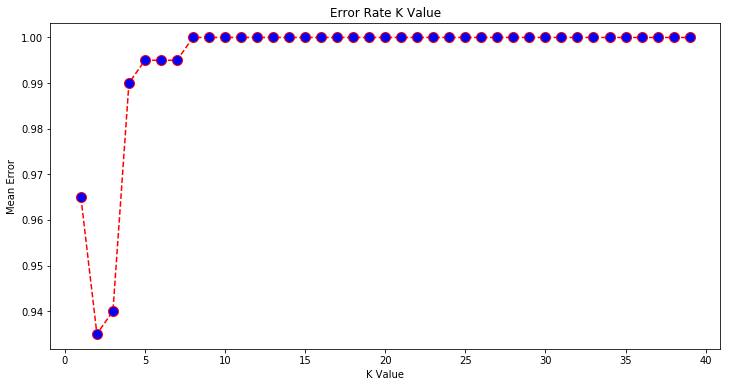

In [37]:
classifier = KNeighborsClassifier(n_neighbors=4)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(classifier.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(classifier.score(X_test, y_test)))
error = []
# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [25]:
clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.64


In [26]:
model = LinearDiscriminantAnalysis()
# define the model evaluation procedure
cv = KFold(n_splits=3, shuffle=True, random_state=1)
# evaluate the model
result = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
# report the mean performance
print('Accuracy: %.3f' % result.mean())

Accuracy: 0.666


In [28]:
svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 0.73
Accuracy of SVM classifier on test set: 0.66


In [29]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.70
Accuracy of Logistic regression classifier on test set: 0.64
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [30]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(X_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(X_test, y_test)))

Accuracy of LDA classifier on training set: 0.68
Accuracy of LDA classifier on test set: 0.60


In [31]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

Accuracy of GNB classifier on training set: 0.53
Accuracy of GNB classifier on test set: 0.46
